<a href="https://colab.research.google.com/github/VictoriaTeCa/ExtracCa4/blob/main/act4_extracci%C3%B3n_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#instalamos nueva librería
%pip install funpymodeling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [8]:
micro=pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [9]:
#ajustar máximo de columnas
#es para que te salgan todas las columnas
pd.options.display.max_columns=None

In [10]:
#primeros dos
micro.head(2)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

In [11]:
#seleccionamos las columnas que vamos a utilizar
micro1=micro.iloc[:,[1,3,9,10,11,12,15,25,26,27,35,36,47,48,53,86,87,88,91,96]]
micro1.head(2)

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,20_reviews_finances_monthly,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,193_sales_planning_tools,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,249_technology_training,261_technology_organization
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,yes,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,no,Software especializado,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,NaN,NaN
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),yes,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",NaN,NaN


# **LIMPIAMOS LA BASE DE DATOS**

In [12]:
#IDENTIFICAR VALORES NULOS
valores_nulos=micro1.isnull().sum()
valores_nulos

_title                                                     0
_updated_by                                                0
232_type_of_store                                          0
108_does_the_micro_retailer_has_a_barred_window_           0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
184_store_devices                                          2
20_reviews_finances_monthly                               63
49_inventory_records                                      61
18_sales_records                                          61
210_sales_channels                                        89
189_payment_methods                                       64
214_customer_relationship_tools                           76
33_credit_to_customers                                    64
193_sales_planning_tools                                  89
157_frequency_organize_shelves                            75
158_charact_organize_pro

In [13]:
#reemplazamos los valores nulos
micro2=micro1.fillna(method="bfill")
micro3=micro2.fillna(method="ffill")


valores_nulos1=micro3.isnull().sum()
valores_nulos1

<ipython-input-13-c6d6d94c938d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  micro2=micro1.fillna(method="bfill")
<ipython-input-13-c6d6d94c938d>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  micro3=micro2.fillna(method="ffill")


_title                                                   0
_updated_by                                              0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
20_reviews_finances_monthly                              0
49_inventory_records                                     0
18_sales_records                                         0
210_sales_channels                                       0
189_payment_methods                                      0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
193_sales_planning_tools                                 0
157_frequency_organize_shelves                           0
158_charact_organize_products_on_shelves                

# INICIO DE EXTRACCIÓN DE CARACTERÍSTICAS

In [14]:
#COLUMNA UNO
columna1=freq_tbl(micro3['_title'])
columna1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304
7,"November 11, 2022",1,0.005848,0.994152
8,"November 2, 2022",1,0.005848,1.000000


In [15]:
#ponemos filtro mayor a 20, porqe queremos saber únicamente pocas fechas, para saber que mes y día son los que son diseñados para ingresar datos al sistema
filtro1=columna1[columna1['frequency']>20]
filtro1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947


In [16]:
filtro_index1=filtro1.set_index('_title')
filtro_index1

,frequency,percentage,cumulative_perc
_title,,,
"November 9, 2022",73,0.426901,0.426901
"November 10, 2022",26,0.152047,0.578947


Text(0, 0.5, 'Frecuencia')

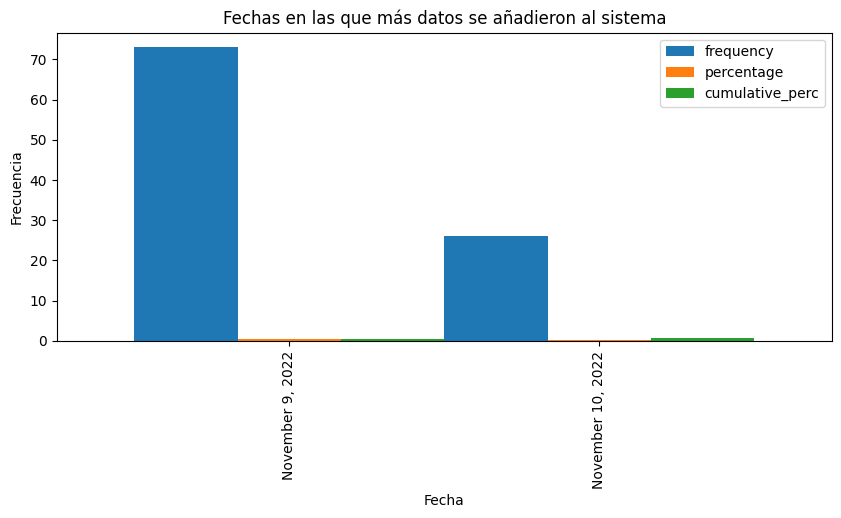

In [17]:
#Realizamos grafico de área del dataframe filtrado
#realizamos gráfico de barras del df filtrado BARRAS
filtro_index1.plot(kind='bar', width=1, figsize=(10,4))
plt.title('Fechas en las que más datos se añadieron al sistema')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

In [18]:
#COLUMNA DOS
columna2=freq_tbl(micro3['_updated_by'])
columna2

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


<Axes: ylabel='frequency'>

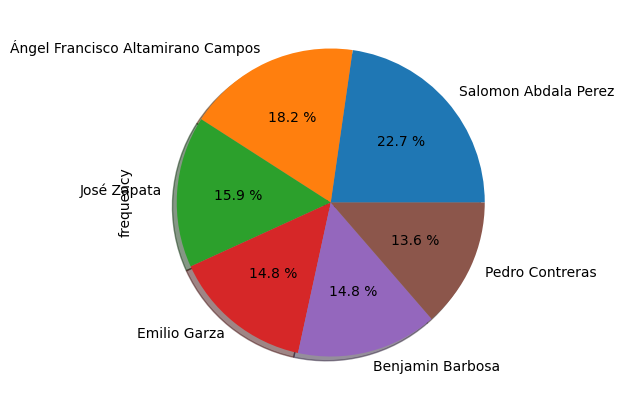

In [19]:
filtro2=columna2[columna2['frequency']>9]

filtro_index2=filtro2.set_index('_updated_by')

#gráfico PIE
filtro_index2['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [20]:
#COLUMNA TRES
columna3=freq_tbl(micro3['232_type_of_store'])
columna3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [21]:
filtro3=columna3[columna3['frequency']>6]
filtro_index3=filtro3.set_index('232_type_of_store')

<Axes: xlabel='232_type_of_store'>

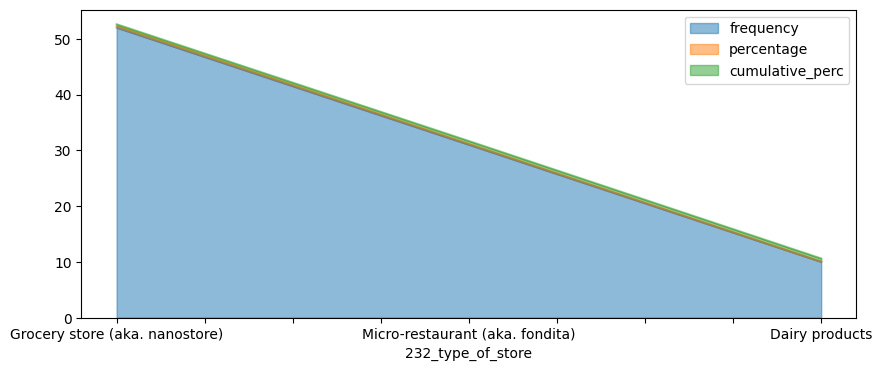

In [22]:
filtro_index3.plot(kind='area', figsize= (10,4), alpha= 0.5)

In [23]:
#COLUMNA CUATRO
columna4=freq_tbl(micro3['108_does_the_micro_retailer_has_a_barred_window_'])
columna4

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [24]:
filtro4=columna4[columna4['frequency']>6]
filtro_index4=filtro4.set_index('108_does_the_micro_retailer_has_a_barred_window_')

<Axes: ylabel='frequency'>

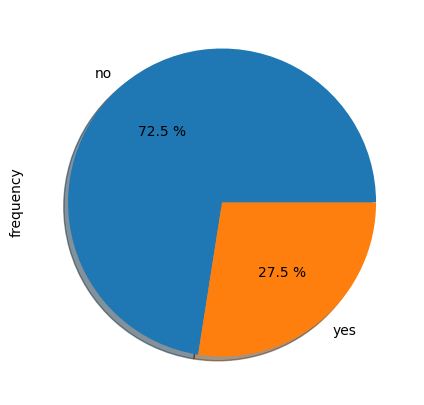

In [25]:
filtro_index4['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [26]:
#COLUMNA CINCO
columna5=freq_tbl(micro3['99_does_the_micro_retailer_exhibits_products_outside_'])
columna5

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [27]:
filtro5=columna5[columna5['frequency']>6]
filtro_index5=filtro5.set_index('99_does_the_micro_retailer_exhibits_products_outside_')

Text(0, 0.5, 'Frecuencia')

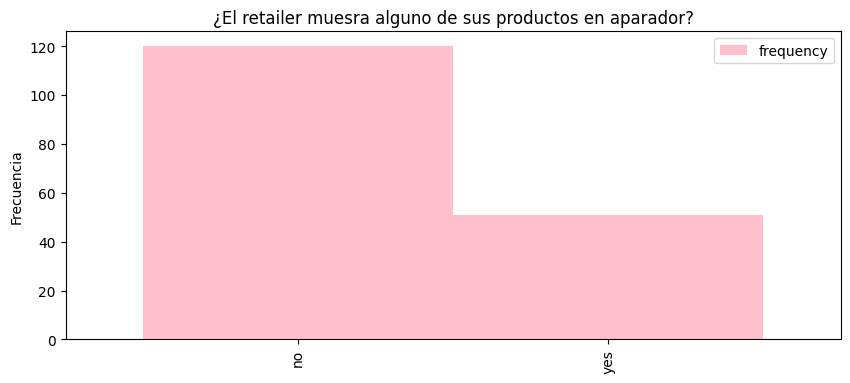

In [28]:
#ELIMINAR COLUMNAS
filtro_index5=filtro_index5.drop(['percentage','cumulative_perc'],axis=1)

filtro_index5.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('¿El retailer muesra alguno de sus productos en aparador?')
plt.xlabel('')
plt.ylabel('Frecuencia')



In [29]:
#COLUMNA SEIS
columna6=freq_tbl(micro3['102_does_the_micro_retailer_sells_fresh_products_'])
columna6

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [30]:
filtro6=columna6[columna5['frequency']>1]
filtro_index6=filtro6.set_index('102_does_the_micro_retailer_sells_fresh_products_')

<Axes: ylabel='frequency'>

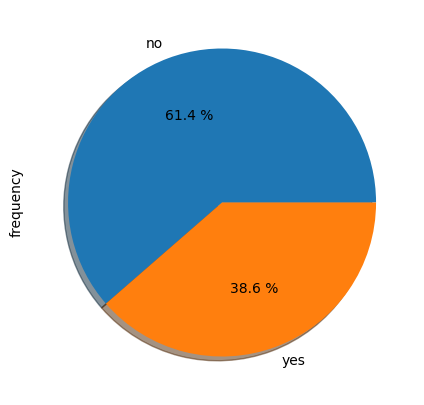

In [31]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index6['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [32]:
#COLUMNA SIETE
columna7=freq_tbl(micro3['184_store_devices'])
columna7

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363
9,Dataphone (i.e. card payments),4,0.023392,0.701754


In [33]:
filtro7=columna7[columna7['frequency']>8]
filtro_index7=filtro7.set_index('184_store_devices')

Text(0, 0.5, 'Frecuencia')

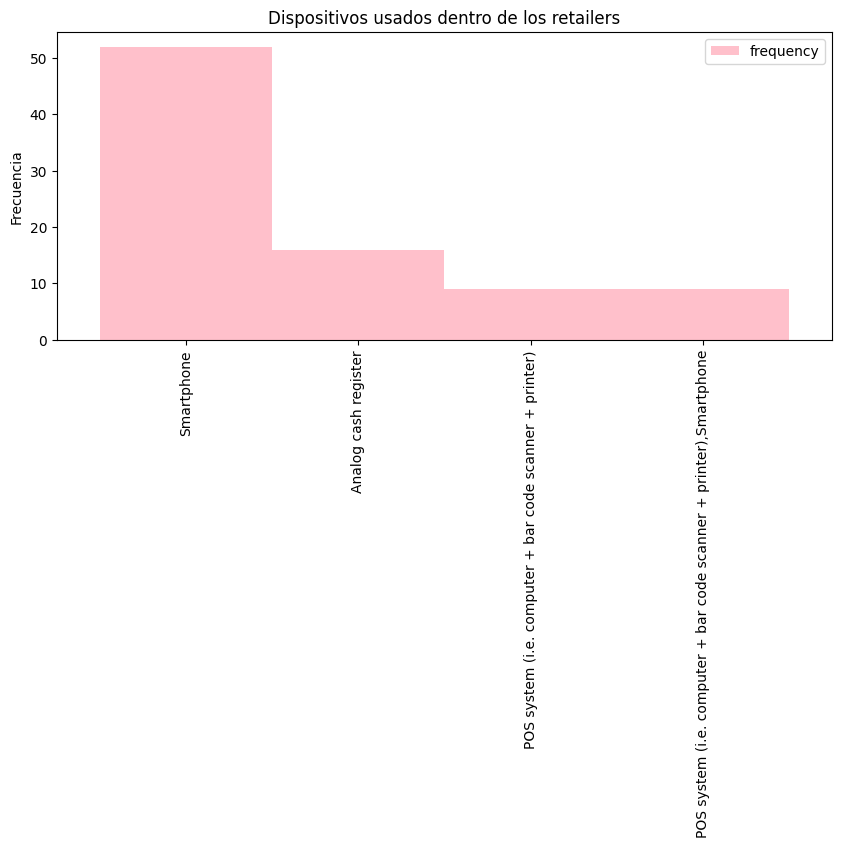

In [34]:
#ELIMINAR COLUMNAS
filtro_index7=filtro_index7.drop(['percentage','cumulative_perc'],axis=1)

filtro_index7.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Dispositivos usados dentro de los retailers')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [35]:
#COLUMNA OCHO
columna8=freq_tbl(micro3['20_reviews_finances_monthly'])
columna8

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,127,0.74269,0.74269
1,no,44,0.25731,1.00000


In [36]:
filtro8=columna8[columna8['frequency']>8]
filtro_index8=filtro8.set_index('20_reviews_finances_monthly')

<Axes: ylabel='frequency'>

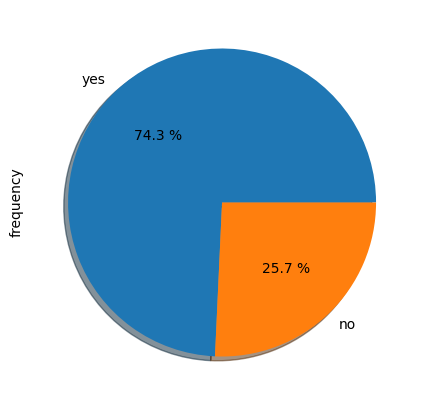

In [37]:
filtro_index8['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [38]:
#COLUMNA NUEVE
columna9=freq_tbl(micro3['49_inventory_records'])
columna9

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
6,Mentalmente,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [39]:
filtro9=columna9[columna9['frequency']>17]
filtro_index9=filtro9.set_index('49_inventory_records')

Text(0, 0.5, 'Frecuencia')

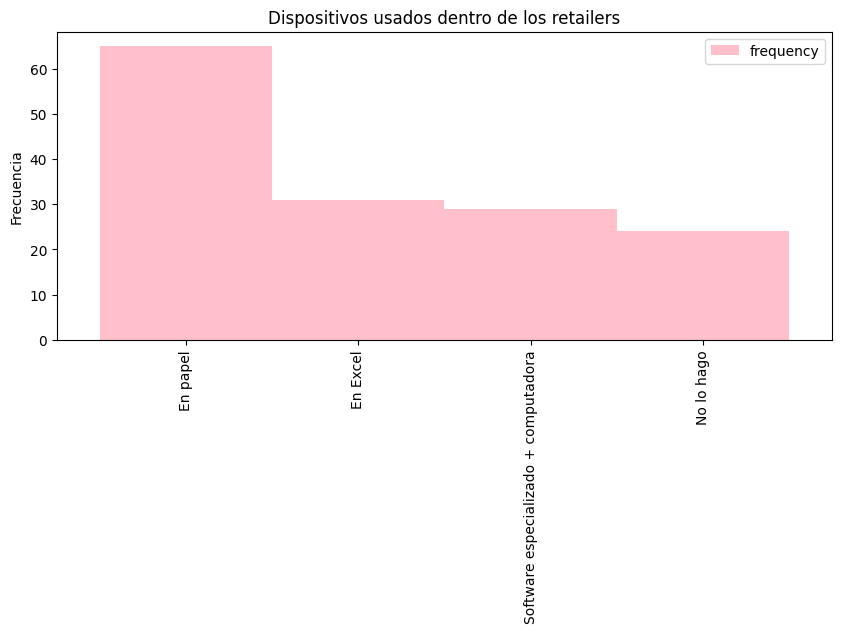

In [40]:
#ELIMINAR COLUMNAS
filtro_index9=filtro_index9.drop(['percentage','cumulative_perc'],axis=1)

filtro_index9.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Dispositivos usados dentro de los retailers')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [41]:
#COLUMNA DIEZ
columna10=freq_tbl(micro3['18_sales_records'])
columna10

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,67,0.391813,0.391813
1,Software especializado + computadora,26,0.152047,0.543860
2,No lo hago,24,0.140351,0.684211
3,En Excel,21,0.122807,0.807018
4,"En Excel,En papel",12,0.070175,0.877193
5,Caja registradora (análoga),6,0.035088,0.912281
6,"Aplicación móvil (i.e. App) + smartphone,Caja ...",5,0.029240,0.941520
7,"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064
8,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.964912
9,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.970760


In [42]:
filtro10=columna10[columna10['frequency']>20]
filtro_index10=filtro10.set_index('18_sales_records')

<Axes: ylabel='frequency'>

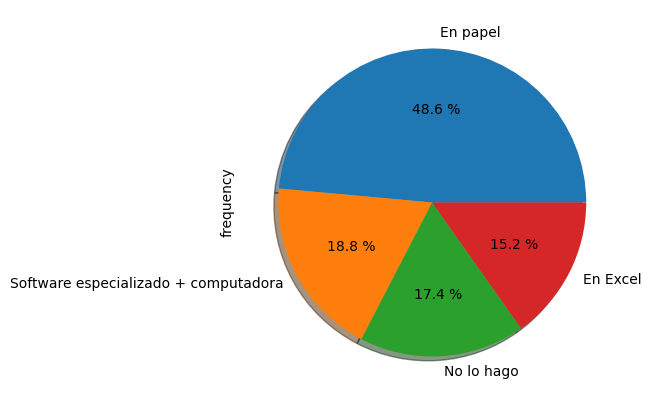

In [43]:
filtro_index10['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [44]:
#COLUMNA ONCE
columna11=freq_tbl(micro3['210_sales_channels'])
columna11

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram),What...",26,0.152047,0.152047
1,WhatsApp,22,0.128655,0.280702
2,"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
3,Llamada a Teléfono fijo,12,0.070175,0.467836
4,conocidos paquetes cerrados,10,0.058480,0.526316
5,"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.573099
6,Llamada a Teléfono celular,7,0.040936,0.614035
7,"Página web propia,WhatsApp",7,0.040936,0.654971
8,"Llamada a Teléfono celular,Redes sociales (e.g...",7,0.040936,0.695906
9,"Página web propia,Redes sociales (e.g. Faceboo...",7,0.040936,0.736842


In [45]:
filtro11=columna11[columna11['frequency']>10]
filtro_index11=filtro11.set_index('210_sales_channels')

Text(0, 0.5, 'Frecuencia')

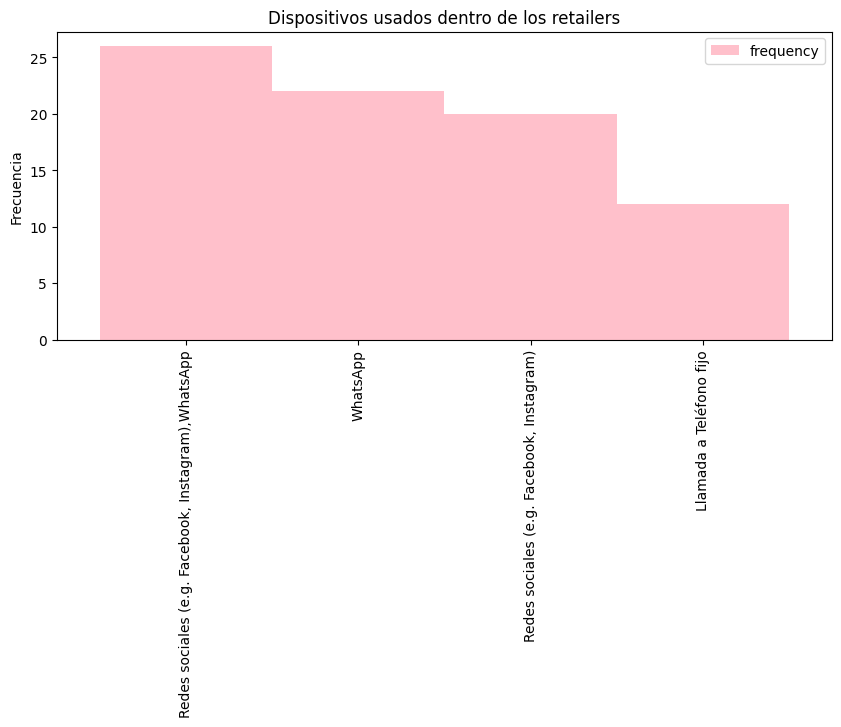

In [46]:
#ELIMINAR COLUMNAS
filtro_index11=filtro_index11.drop(['percentage','cumulative_perc'],axis=1)

filtro_index11.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Dispositivos usados dentro de los retailers')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [47]:
#COLUMNA DOCE
columna12=freq_tbl(micro3['189_payment_methods'])
columna12

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [48]:
filtro12=columna12[columna12['frequency']>20]
filtro_index12=filtro12.set_index('189_payment_methods')

<Axes: ylabel='frequency'>

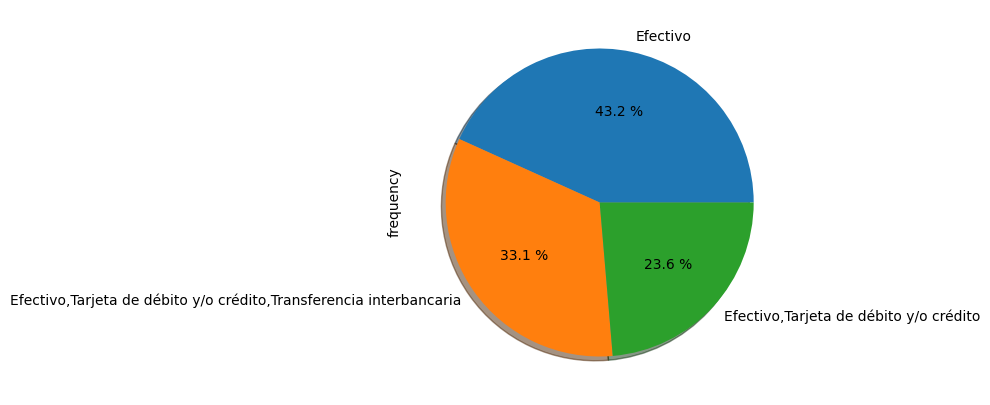

In [49]:
filtro_index12['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [50]:
#COLUMNA TRECE
columna13=freq_tbl(micro3['214_customer_relationship_tools'])
columna13

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,57,0.333333,0.333333
1,Ninguna,44,0.257310,0.590643
2,Aplicación móvil,31,0.181287,0.771930
3,"Aplicación móvil,Redes sociales",22,0.128655,0.900585
4,Cuaderno,9,0.052632,0.953216
5,Teléfono,1,0.005848,0.959064
6,"Cuaderno,Redes sociales",1,0.005848,0.964912
7,"Aplicación móvil,De frente",1,0.005848,0.970760
8,Físico,1,0.005848,0.976608
9,"Aplicación móvil,Ninguna",1,0.005848,0.982456


In [51]:
filtro13=columna13[columna13['frequency']>10]
filtro_index13=filtro13.set_index('214_customer_relationship_tools')

Text(0, 0.5, 'Frecuencia')

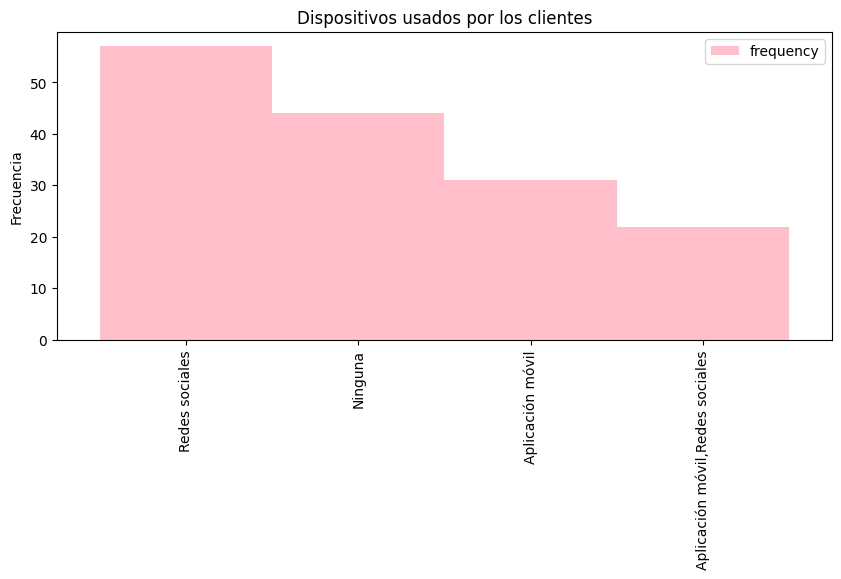

In [52]:
#ELIMINAR COLUMNAS
filtro_index13=filtro_index13.drop(['percentage','cumulative_perc'],axis=1)

filtro_index13.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Dispositivos usados por los clientes')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [53]:
#COLUMNA CATORCE
columna14=freq_tbl(micro3['33_credit_to_customers'])
columna14

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,135,0.789474,0.789474
1,yes,36,0.210526,1.000000


In [54]:
filtro14=columna14[columna14['frequency']>1]
filtro_index14=filtro14.set_index('33_credit_to_customers')

<Axes: ylabel='frequency'>

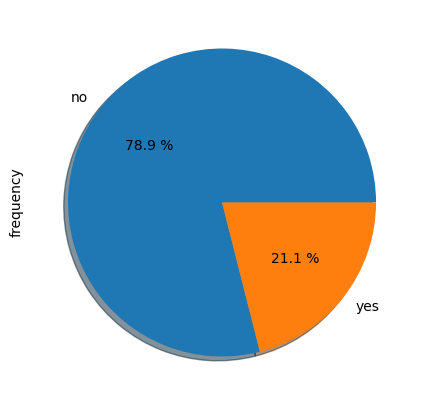

In [55]:
filtro_index14['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [56]:
#COLUMNA QUINCE
columna15=freq_tbl(micro3['193_sales_planning_tools'])
columna15

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,71,0.415205,0.415205
1,Cuaderno,37,0.216374,0.631579
2,Software especializado,29,0.169591,0.801170
3,Excel,16,0.093567,0.894737
4,"Cuaderno,Excel",4,0.023392,0.918129
5,"Cuaderno,Ninguna",2,0.011696,0.929825
6,En físico,2,0.011696,0.941520
7,Other,1,0.005848,0.947368
8,Mental,1,0.005848,0.953216
9,Por temporada de pan,1,0.005848,0.959064


In [57]:
filtro15=columna15[columna15['frequency']>16]
filtro_index15=filtro15.set_index('193_sales_planning_tools')

Text(0, 0.5, 'Frecuencia')

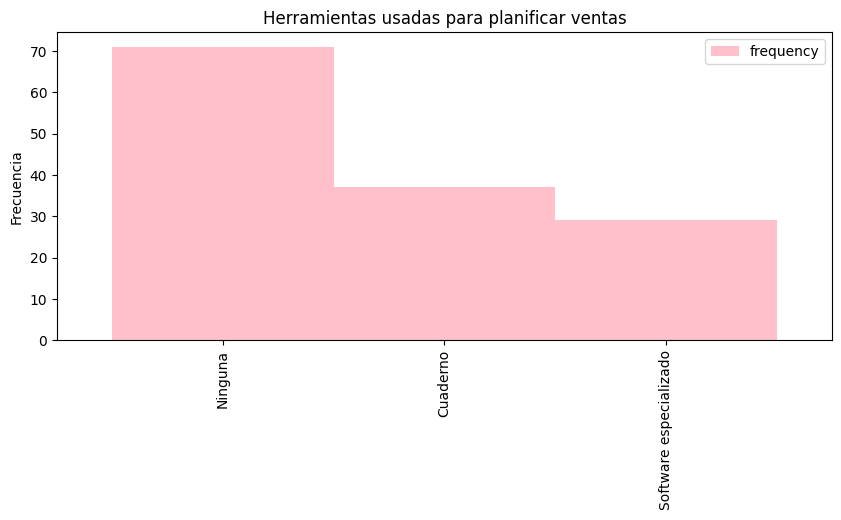

In [58]:
#ELIMINAR COLUMNAS
filtro_index15=filtro_index15.drop(['percentage','cumulative_perc'],axis=1)

filtro_index15.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Herramientas usadas para planificar ventas')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [59]:
#COLUMNA 16
columna16=freq_tbl(micro3['157_frequency_organize_shelves'])
columna16

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304
6,Semestralmente,1,0.005848,0.994152
7,No se tiene,1,0.005848,1.000000


In [60]:
filtro16=columna16[columna16['frequency']>20]
filtro_index16=filtro16.set_index('157_frequency_organize_shelves')

<Axes: ylabel='frequency'>

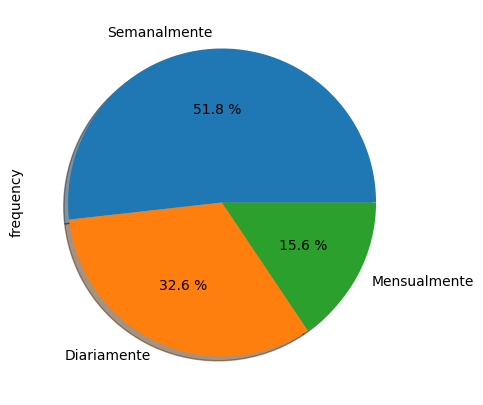

In [61]:
filtro_index16['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [62]:
#COLUMNA 17
columna17=freq_tbl(micro3['158_charact_organize_products_on_shelves'])
columna17

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",66,0.385965,0.385965
1,Tamaño,28,0.163743,0.549708
2,Frecuencia de venta,24,0.140351,0.690058
3,Margen de utilidad,14,0.081871,0.771930
4,Precio,9,0.052632,0.824561
5,"Refrigeración,Tamaño",6,0.035088,0.859649
6,"Categoría (e.g. limpieza, aseo personal, comes...",4,0.023392,0.883041
7,Refrigeración,4,0.023392,0.906433
8,"Frecuencia de venta,Refrigeración",3,0.017544,0.923977
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.935673


In [63]:
filtro17=columna17[columna17['frequency']>10]
filtro_index17=filtro17.set_index('158_charact_organize_products_on_shelves')

Text(0, 0.5, 'Frecuencia')

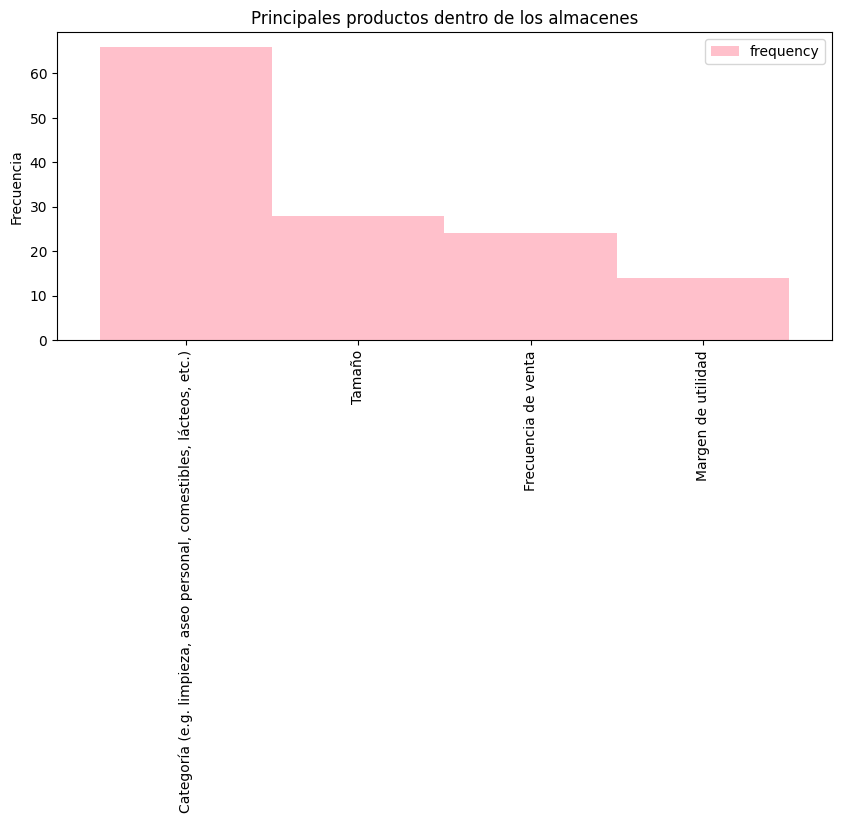

In [64]:
#ELIMINAR COLUMNAS
filtro_index17=filtro_index17.drop(['percentage','cumulative_perc'],axis=1)

filtro_index17.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Principales productos dentro de los almacenes')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [65]:
#COLUMNA 18
columna18=freq_tbl(micro3['161_actions_stockouts'])
columna18

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Solicitar tiempo al cliente para conseguir el ...,68,0.397661,0.397661
1,Ofrecer un producto sustituto,40,0.233918,0.631579
2,"Ofrecer un producto sustituto,Solicitar tiempo...",17,0.099415,0.730994
3,"Informar al proveedor,Ofrecer un producto sust...",10,0.058480,0.789474
4,Perder la venta,9,0.052632,0.842105
5,Informar al proveedor,9,0.052632,0.894737
6,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.923977
7,apuntar,5,0.029240,0.953216
8,"Informar al proveedor,Ofrecer un producto sust...",2,0.011696,0.964912
9,"Informar al proveedor,Perder la venta",2,0.011696,0.976608


In [66]:
filtro18=columna18[columna18['frequency']>9]
filtro_index18=filtro18.set_index('161_actions_stockouts')

<Axes: ylabel='frequency'>

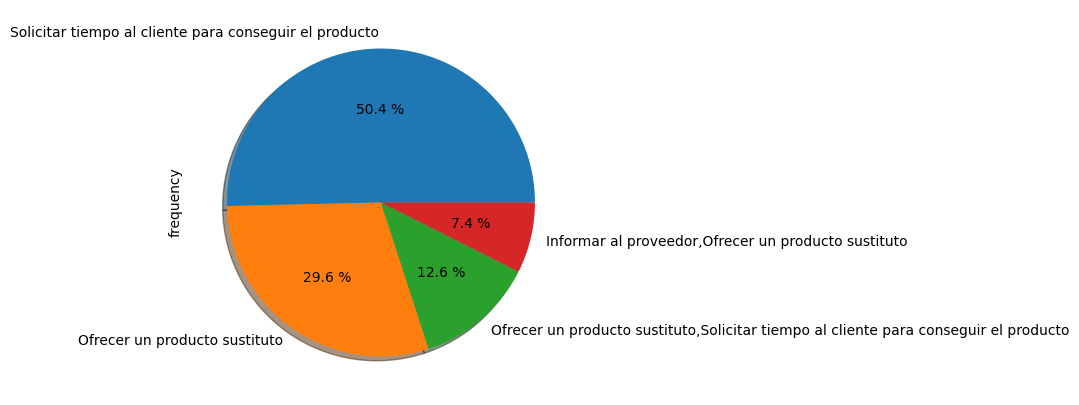

In [67]:
filtro_index18['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")

In [68]:
#COLUMNA 19
columna19=freq_tbl(micro3['249_technology_training'])
columna19

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,79,0.461988,0.461988
1,De acuerdo,62,0.362573,0.824561
2,Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
3,Totalmente en desacuerdo,10,0.058480,0.994152
4,En desacuerdo,1,0.005848,1.000000


In [69]:
filtro19=columna19[columna19['frequency']>1]
filtro_index19=filtro19.set_index('249_technology_training')

Text(0, 0.5, 'Frecuencia')

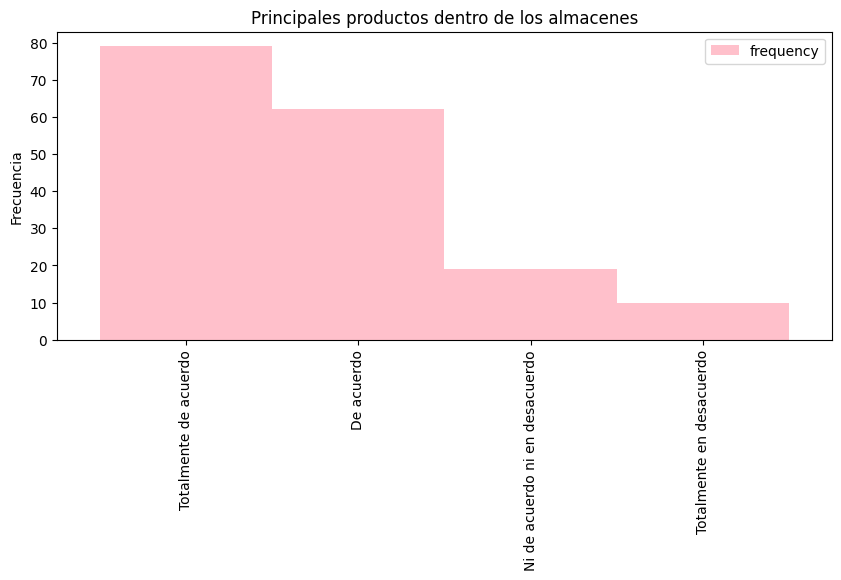

In [70]:
#ELIMINAR COLUMNAS
filtro_index19=filtro_index19.drop(['percentage','cumulative_perc'],axis=1)

filtro_index19.plot(kind='bar', width=1, figsize=(10,4), color='pink')
plt.title('Principales productos dentro de los almacenes')
plt.xlabel('')
plt.ylabel('Frecuencia')

In [71]:
#COLUMNA 20
columna20=freq_tbl(micro3['261_technology_organization'])
columna20

,261_technology_organization,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,71,0.415205,0.415205
1,De acuerdo,67,0.391813,0.807018
2,Totalmente en desacuerdo,16,0.093567,0.900585
3,Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
4,En desacuerdo,2,0.011696,1.000000


In [72]:
filtro20=columna20[columna20['frequency']>1]
filtro_index20=filtro20.set_index('261_technology_organization')

<Axes: ylabel='frequency'>

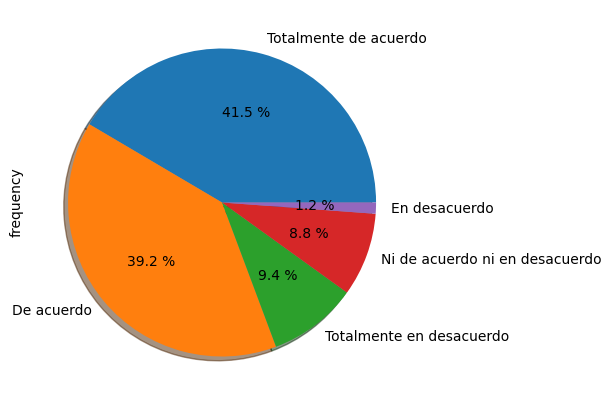

In [73]:
filtro_index20['frequency'].plot(kind='pie', figsize=(10,5), shadow= True, autopct="%0.1f %%")